#**Digit Recognition**

# Import Libraries

In [28]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')

# Read Directories & Folders

In [29]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load the Data



In [30]:
mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

display(" train data",mnist_train )
display(" test data",mnist_test )


' train data'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


' test data'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Get train and test data

In [31]:
# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

In [32]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [33]:
# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

Why 255?

1 byte of information = 8 bits. each bit has 2 values 0 or 1; the color intensity is 2^8=256 possible value;
i.e. goes from 0 to 255

by dividing by 255, we are making maximum value 1. Now black will be 1 and 0 is white; with various shades of grey in between

In [34]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

##  Display images

To check whether everything worked as expected, let's take a look at a few images from each folder.

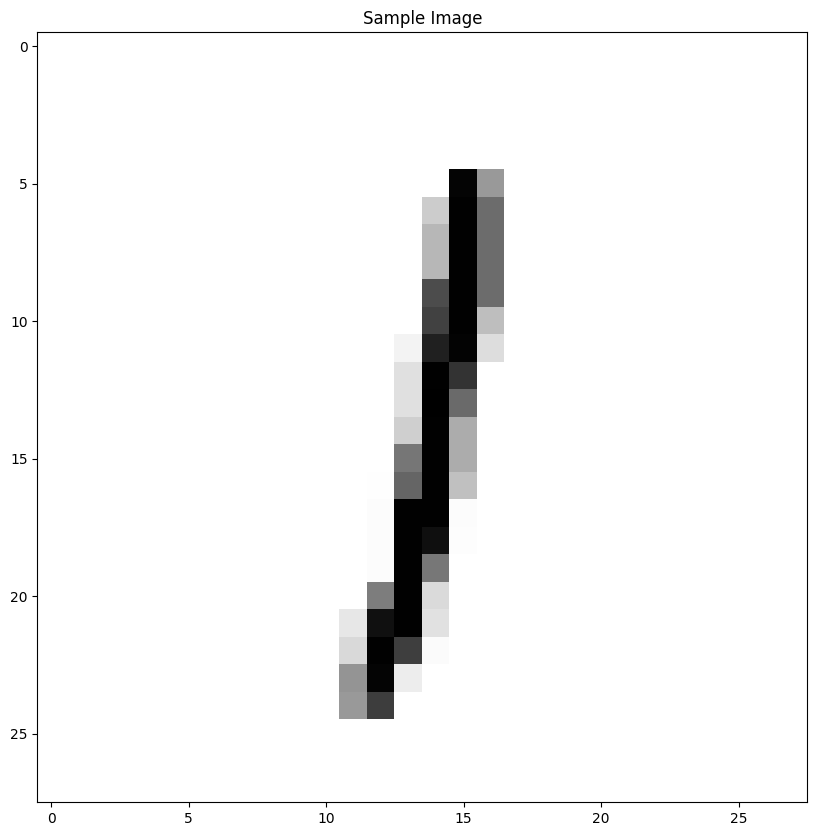

In [35]:

import random
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')

# replace random.randint(0,no_images) in code above with a number if you want to see specific image.
#This dispalys a random image each time

plt.title("Sample Image")
plt.show()

Here 1 is black and 0 is white....after normalization

Smaller size helps us visualise better?

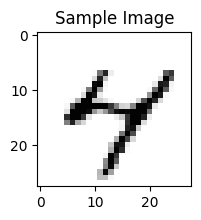

In [36]:

# Display random Image
fig, ax = plt.subplots(figsize=(2,2)) # now fix size is 2 x 2

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')
plt.title("Sample Image")
plt.show()

### Data Conversion
We have a validation set of 20%

In [37]:
validation_size= 0.2  #you can change this as per our preference


# Split between train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= validation_size)

In [38]:
# Get one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

## Model Architecture


Defining the Model (Convolutional Neural Network)

The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. - [SOURCE- read more click here](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

![A standard convolution](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)


Below is a function defining a CNN model with 3 main blocks of Convolutional layers. The first two blocks follow the same structure:
1. Apply a Conv2D layer with 3x3 kernel size and valid padding, then another Conv2D layer with 3x3 kernel but with same padding to keep the same dimensions
2. Apply a BatchNormalization layer to avoid layers being too depended from one another and allowing each activation to have 0 mean
3. A RELU activation and a MaxPooling2D layer with 2x2 kernel size and stride=2
4. An element-wise Dropout layer applied to MaxPooling2D keeping 80% of the activation units

The final 2 layers consists of a Fully Connected Layer that uses a Softmax activation for classification.

In [39]:
# Build CNN Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [40]:
model = CNN()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Compilation

Here we will use an Adam optimizer with a Cross entropy loss function.

In [41]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1_1 (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1_2 (Conv2D)                  │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 26, 26, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (Activation)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2d_1 (MaxPooling2D)                │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_1 (Dropout)                     │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2_1 (Conv2D)                  │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2_2 (Conv2D)                  │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 11, 11, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (Activation)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2d_2 (MaxPooling2D)                │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_2 (Dropout)                     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         160,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,486 (884.71 KB)

 Trainable params: 226,294 (883.96 KB)

 Non-trainable params: 192 (768.00 B)

## Training and Prediction

We will train the model for 50 epochs, with a batch size of 64.

In [43]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1)

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8563 - loss: 0.4741 - val_accuracy: 0.9787 - val_loss: 0.0662
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9801 - loss: 0.0639 - val_accuracy: 0.9786 - val_loss: 0.0625
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0428 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9889 - loss: 0.0339 - val_accuracy: 0.9835 - val_loss: 0.0504
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9888 - loss: 0.0340 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.

You can make verbose=0, in the code above if you did not  want to see each step in the process

### Graphing Accuracy

Let us check how our model went by graphing accuracy with validation accuracy, and our training loss with validation loss.

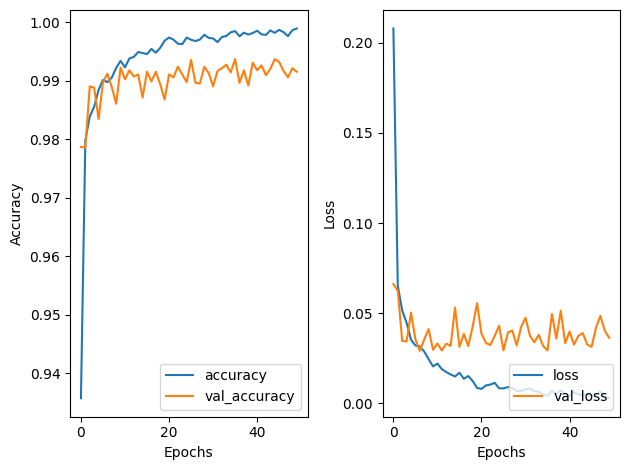

In [44]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

As you can see 20 epochs should have been fine. Not much improvement in scores after 20 epochs.

What can you change to get better validation? Try our different parameter changes and see!!

### Predictions

Below is a function to help see whether we have trained the model properly. "imgs" is a parameter to see the first x number of images in our test dataset.

In [45]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


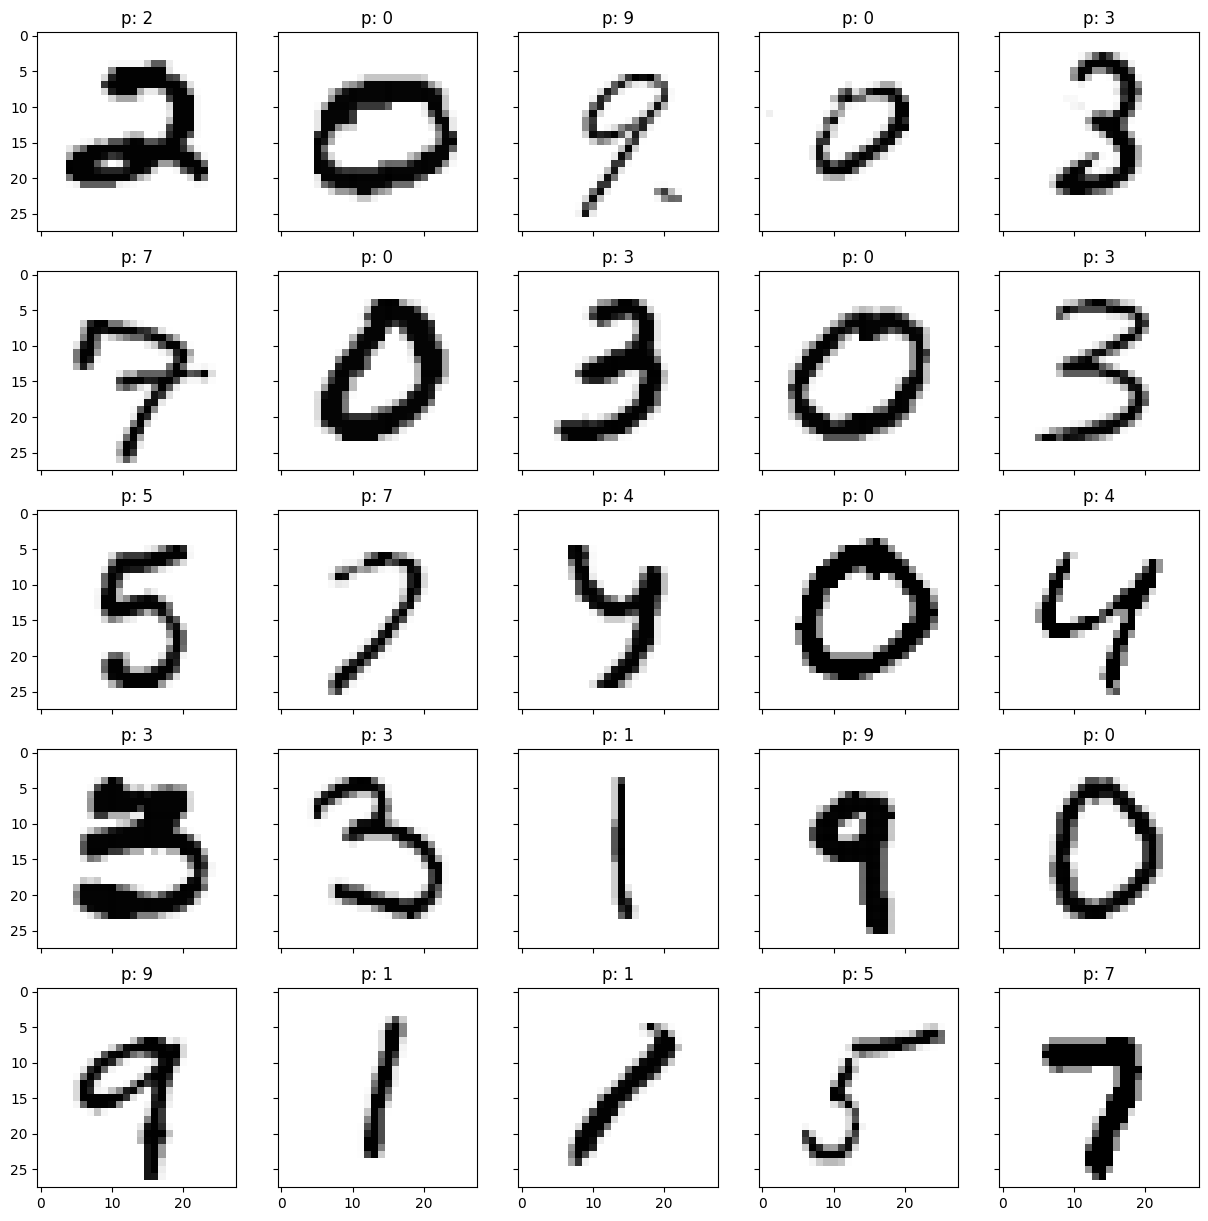

In [46]:
predict(model, X_test, 25)

## Submission

We create the full prediction and place the predictions into the requested format.

In [47]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [48]:
name="Aishwarya"

file_name=name+"_mnist_submission.csv"

In [49]:
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv(file_name, index=False)